# Enron Dataset Exploration

In [115]:
%matplotlib inline
import pickle
import pprint
import sys

sys.path.append("../tools/")
from feature_format import featureFormat
from feature_format import targetFeatureSplit



enron_data = pickle.load(open("../final_project/final_project_dataset.pkl", "r"))

The code chunk above loads the data from a pickle file.

In [116]:
print("The number of people in the dataset {:.0f}".format(len(enron_data.keys())))

The number of people in the dataset 146


In [117]:
print("The number of data fields for each person are {:.0f}".format(len(enron_data['METTS MARK'])))

The number of data fields for each person are 21


In [118]:
print("The keys in the data set are: {}".format(enron_data['METTS MARK'].keys()))

The keys in the data set are: ['salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'director_fees', 'deferred_income', 'long_term_incentive', 'email_address', 'from_poi_to_this_person']


I will need to remove the email address field which obviously won't be useful information.

In [119]:
count = 0
for person in enron_data.keys():
    if enron_data[person]["poi"] == 1:
        count += 1
    else:
        continue
print("The number of pois (positive labels) is {}".format(count))

The number of pois (positive labels) is 18


In [120]:
# Check Salary
count_non_nans = 0
count_nans = 0
for key in enron_data.keys():
    if enron_data[key]['salary'] != 'NaN':
        count_non_nans += 1
    else:
        count_nans += 1
print("The amount of people with a known salary are {}".format(count_non_nans))
print("The amount of people with an unknown salary are {}".format(count_nans))

# Check emails
count_non_nans = 0
count_nans = 0
for key in enron_data.keys():
    if enron_data[key]['email_address'] != 'NaN':
        count_non_nans += 1
    else:
        count_nans += 1
print("")
print("The amount of people with a known email are {}".format(count_non_nans))
print("The amount of people with an unknown email are {}".format(count_nans))

The amount of people with a known salary are 95
The amount of people with an unknown salary are 51

The amount of people with a known email are 111
The amount of people with an unknown email are 35


In [131]:
count_non_nans = 0
count_nans = 0
for key in enron_data.keys():
    if enron_data[key]['total_payments'] != 'NaN':
        count_non_nans += 1
    else:
        count_nans += 1
print("The amount of people with a value for total payments are {}".format(count_non_nans))
print("The amount of people with a `NaN` value for total payments are {}".format(count_nans))
print("Percentage {:.2f}".format(float(count_nans)/(float(count_non_nans) + float(count_nans))))

The amount of people with a value for total payments are 123
The amount of people with a `NaN` value for total payments are 20
Percentage 0.14


In [122]:
# Percentage of POIs who have "NaN" as their total payments
count_non_nans = 0
count_nans = 0
for key in enron_data.keys():
    if enron_data[key]['poi'] == 1:
        if enron_data[key]['total_payments'] != 'NaN':
            count_non_nans += 1
        else:
            count_nans += 1
    else:
        continue
print("The amount of POIs with a value for total payments are {}".format(count_non_nans))
print("The amount of POIs with a **NaN** value for total payments are {}".format(count_nans))
print("Percentage {:.2f}".format(float(count_nans)/(float(count_non_nans) + float(count_nans))))

The amount of POIs with a value for total payments are 18
The amount of POIs with a **NaN** value for total payments are 0
Percentage 0.00


The two code chunks identify that all POIs have a `totalpayments` value. Therefore, if I tried to collect additional POIs without having a `totalpaynments` value for them, it would be counterproductive.

In [123]:
# Outlier salary / bonus
for key in enron_data.keys():
    if enron_data[key]['salary'] > 1000000 and enron_data[key]['salary'] != 'NaN':
        print "name: " + key
        print "salary:", enron_data[key]['salary']
        print "bonus: ", enron_data[key]['bonus']

name: LAY KENNETH L
salary: 1072321
bonus:  7000000
name: SKILLING JEFFREY K
salary: 1111258
bonus:  5600000
name: TOTAL
salary: 26704229
bonus:  97343619
name: FREVERT MARK A
salary: 1060932
bonus:  2000000


Prior using the data to build predicitive models, it's prudent to check for outliers. The above output identifies several individuals with very large salaries. It turns out there is a key for "TOTAL". This will need to be removed.

In [124]:
import operator
#count 'Nan' per key to see who is missing al ot of data
#found 'THE TRAVEL AGENCY IN THE PARK with 18 NaNs
count_dict = {}
for name in enron_data.keys():
    for value in enron_data[name].values():
        if value == 'NaN':
            count += 1
    count_dict[name] = count
    count = 0
sorted_dict = sorted(count_dict.items(), key=operator.itemgetter(1))
pprint.pprint(sorted_dict)

[('HAEDICKE MARK E', 2),
 ('LAY KENNETH L', 2),
 ('ALLEN PHILLIP K', 2),
 ('FREVERT MARK A', 2),
 ('PIPER GREGORY F', 3),
 ('DERRICK JR. JAMES V', 3),
 ('HANNON KEVIN P', 4),
 ('MULLER MARK S', 4),
 ('RIEKER PAULA H', 4),
 ('OLSON CINDY K', 4),
 ('BELDEN TIMOTHY N', 4),
 ('RICE KENNETH D', 4),
 ('WASAFF GEORGE', 4),
 ('SHARP VICTORIA T', 4),
 ('BUY RICHARD B', 4),
 ('MCMAHON JEFFREY', 5),
 ('BLACHMAN JEREMY M', 5),
 ('COLWELL WESLEY', 5),
 ('WALLS JR ROBERT H', 5),
 ('SHANKMAN JEFFREY A', 5),
 ('BERGSIEKER RICHARD P', 5),
 ('BIBI PHILIPPE A', 5),
 ('LAVORATO JOHN J', 5),
 ('BANNANTINE JAMES M', 5),
 ('SHELBY REX', 5),
 ('DEFFNER JOSEPH M', 5),
 ('WHALLEY LAWRENCE G', 5),
 ('MCCONNELL MICHAEL S', 5),
 ('DELAINEY DAVID W', 5),
 ('FALLON JAMES B', 5),
 ('BOWEN JR RAYMOND M', 5),
 ('FITZGERALD JAY L', 5),
 ('DURAN WILLIAM D', 5),
 ('THORN TERENCE H', 5),
 ('CALGER CHRISTOPHER F', 5),
 ('KAMINSKI WINCENTY J', 5),
 ('COX DAVID', 5),
 ('SKILLING JEFFREY K', 5),
 ('KEAN STEVEN J', 5),
 ('MCCLE

`LOCKHART EUGENE E` has all 'NaN' values. Also, `THE TRAVEL AGENCY IN THE PARK` is not a person. Therefore I will remove these from the dataset prior to modeling.

These keys removed were identified to be removed from the dataset during data exploration.

In [125]:
keys_remove = ['TOTAL', 'THE TRAVEL AGENCY IN THE PARK', 'LOCKHART EUGENE E']
for key in keys_remove:
    del enron_data[key]

## Visualize Features

All features were plotted to get a better idea of what may seperate a poi from a non-poi. Examples of the more interesting plots are provided below. For the financial features, `bonus`, `total_stock_value`, and `salary` as there seemed to be some seperation from non pois.  These may be useful features in the model.

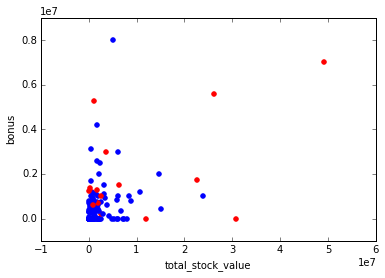

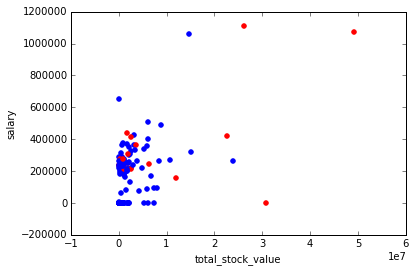

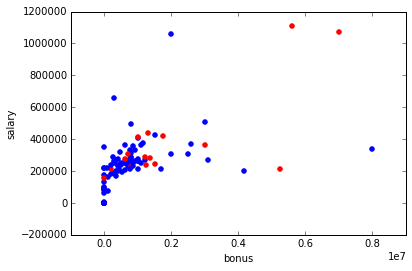

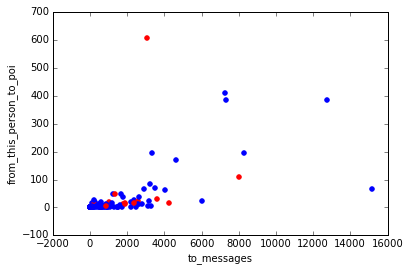

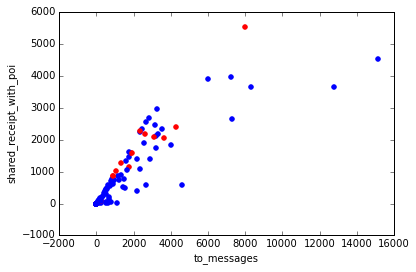

In [126]:
def visualize(data_dict, feature_x, feature_y):
    """
    Generates scatter plot and colors set to identify pois 
    """
    import matplotlib.pyplot as plt
    data = featureFormat(data_dict, [feature_x, feature_y, 'poi'], remove_all_zeroes=False)

    for datum in data:
        x = datum[0]
        y = datum[1]
        poi = datum[2]
        color = 'blue' if not poi else 'red'
        plt.scatter(x, y, color=color)
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.show()  
    
visualize(enron_data, 'total_stock_value', 'bonus')
visualize(enron_data, 'total_stock_value', 'salary')
visualize(enron_data, 'bonus', 'salary')
visualize(enron_data, 'to_messages', 'from_this_person_to_poi')
visualize(enron_data, 'to_messages', 'shared_receipt_with_poi')

#shared_receipt_with_poi
#from_poi_to_this_person

For the email features, there wasn't seperation but when you compute the fraction of poi messages related to total messages, there is seperation. The code below calculates the fraction. An try/except aproach was needed to account for 'NaN' values.

In [127]:
# create from_poi_email_ratio
for name in enron_data.keys():
    try:
        from_poi_email_ratio = float(enron_data[name]['from_poi_to_this_person']) / enron_data[name]['from_messages']
        enron_data[name]['from_poi_email_ratio'] = from_poi_email_ratio
    except:
        enron_data[name]['from_poi_email_ratio'] = 'NaN'


In [128]:
# create to_poi_email_ratio
for name in enron_data.keys():
   
    try:
        to_poi_email_ratio = float(enron_data[name]['from_this_person_to_poi']) / enron_data[name]['to_messages']
        enron_data[name]['to_poi_email_ratio'] = to_poi_email_ratio
    except:
        enron_data[name]['to_poi_email_ratio'] = 'NaN'


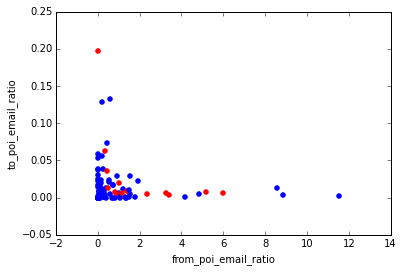

In [129]:
visualize(enron_data, 'from_poi_email_ratio', 'to_poi_email_ratio')

It is obvious that the red points are seperated from the blue points. This aligns with the intuition that pois would be emailing between themself more. Therefore, creating a variable that takes this into account should be useful for a model.